# Lectura

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data=pd.read_excel("Prueba Técnica CMD - Análista .xlsx", sheet_name="Data Base 2024",skiprows=2)
data=data.iloc[:,1:5]
data.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Prueba Técnica CMD - Análista .xlsx'

In [160]:
data2=pd.read_excel("Prueba Técnica CMD - Análista .xlsx", sheet_name="Metodo de facturación",skiprows=2)
data2.columns
data2.head()
data2=data2.iloc[:,1:3]
data2.head(3)

,Customer,Billing Method
0,34601,Email
1,34636,Email
2,34649,Email


In [161]:
region = pd.read_excel("Prueba Técnica CMD - Análista .xlsx", sheet_name="Excel Test",skiprows=1)
region = region.iloc[:,3:5]
region.columns = ["Country", "Region"]
region.head(3)

,Country,Region
0,Costa Rica,Centroamérica
1,Nicaragua,Centroamérica
2,Colombia,Suramérica


# Ejercicio 1.
Traiga el metodo de facturacion que le corresponde a cada cliente. 

In [162]:
# Analisis de duplicados
data[data["Customer"].duplicated()]

,Country,Customer,Name,Customer Type
242,Costa Rica,34837,TIENDA 15,Tercero


Se identifica un registro para el cual se tiene el mismo ID de Customer. Vamos a ahondar en esto.

In [163]:
data[data["Customer"] == 34837]

,Country,Customer,Name,Customer Type
241,Nicaragua,34837,TIENDA 14,Tercero
242,Costa Rica,34837,TIENDA 15,Tercero


El id no es unico entonces a priori no sirve para realizar la union. Asi non funciona Python

In [164]:
df = pd.merge(data,data2,how="left",on="Customer")
df[df["Customer"]==34837] # genera duplicados


,Country,Customer,Name,Customer Type,Billing Method
241,Nicaragua,34837,TIENDA 14,Tercero,Email
242,Nicaragua,34837,TIENDA 14,Tercero,Printed
243,Costa Rica,34837,TIENDA 15,Tercero,Email
244,Costa Rica,34837,TIENDA 15,Tercero,Printed


In [165]:
df = pd.merge(df,region,how="left",on="Country")
# Agreguemos tabien la region
df.head(3)

,Country,Customer,Name,Customer Type,Billing Method,Region
0,Argentina,35180,ABARROTES SUR,Tercero,Email,Suramérica
1,Nicaragua,35858,ACEROS C,Tercero,Printed & Email,Centroamérica
2,Argentina,35417,ACEROS P,Tercero,Email,Suramérica


In [166]:
df =  pd.merge(df, data2, how="left", on=["Customer", "Billing Method"]).drop_duplicates(["Customer", "Country"])
df

,Country,Customer,Name,Customer Type,Billing Method,Region
0,Argentina,35180,ABARROTES SUR,Tercero,Email,Suramérica
1,Nicaragua,35858,ACEROS C,Tercero,Printed & Email,Centroamérica
2,Argentina,35417,ACEROS P,Tercero,Email,Suramérica
3,Nicaragua,36023,ACUEDUCT,Tercero,Printed & Email,Centroamérica
4,Costa Rica,35352,AEES MAN,Tercero,Email,Centroamérica
...,...,...,...,...,...,...
297,Argentina,35899,TPN PLAN,Tercero,Printed & Email,Suramérica
298,Nicaragua,35667,TRICO CO,Tercero,Email,Centroamérica
299,Colombia,35664,TRITURAD,Tercero,Email,Suramérica
300,Argentina,36057,TUBOS DE,Tercero,Printed & Email,Suramérica


# Ejercicio 1.1
¿Cuantos clientes tienen el metodo de facturacion "Electronica" en Argentina?


In [167]:
df.groupby("Country").agg(({"Billing Method": "value_counts"} ))

Billing Method
Country    Billing Method                 
Argentina  Printed & Email              66
           Email                        39
           Printed                       4
Colombia   Printed & Email              49
           Email                        29
           Printed                       4
Costa Rica Printed & Email              16
           Email                        11
Nicaragua  Printed & Email              49
           Email                        30
           Printed                       3

`Respuesta`
En Argentian se tienen 39 clientes con facturacion tipo Email (Electronica)

# Ejercicio 1.2

¿Cuantos clientes tienen el método de facturación "Impresa & Electrónica" en Costa Rica?

`Respuesta`
En Costa Rica se tienen 16 clientes con facturacion tipo impresa y Electronica (Printed & Email)

# Ejercicio 2
Inserte un grafico para el metodo de facturacion por cada pais y concluya.


In [168]:
# grafico interavtivo del metodo de facturacion por pais
billing = df.groupby("Country")["Billing Method"].value_counts().unstack()
billing_long = billing.reset_index().melt(id_vars='Country', var_name='Billing Method', value_name='Count')
fig = px.bar(billing_long, x='Country', y='Count', color='Billing Method', 
             title='Método de facturación por país',
             labels={'Country': 'País', 'Count': 'Cantidad', 'Billing Method': 'Método de facturación'},
             barmode='group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


C:\Users\jhonatan.garcia\AppData\Local\Temp\ipykernel_8708\2579118954.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




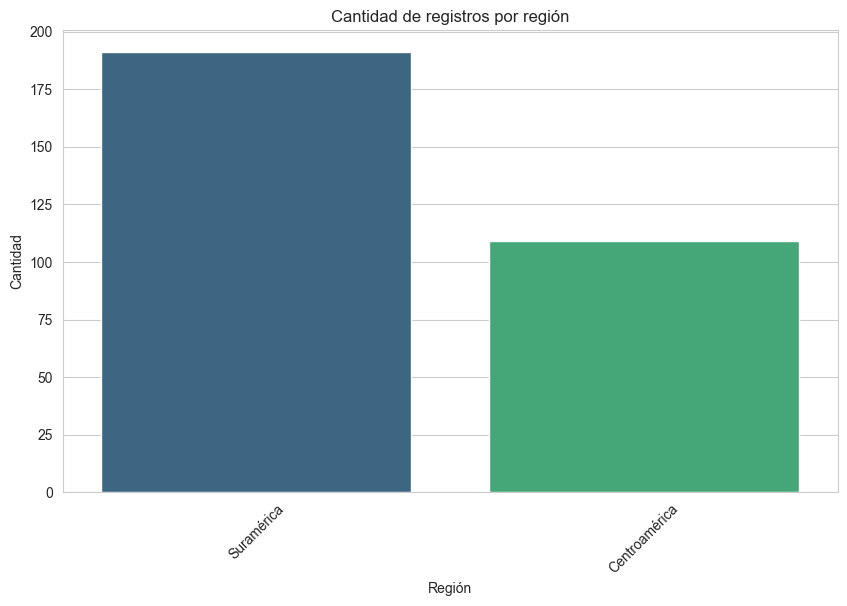

In [169]:

# Crear un gráfico de barras con estilo mejorado
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Estilo de fondo
sns.countplot(data=df, x="Region", palette="viridis")  # Paleta de colores
plt.title("Cantidad de registros por región")
plt.xlabel("Región")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()



`Respuesta`

 * Participación del mercado:
  
    La participación del mercado es mayor en Suramérica que en Centroamérica.

 * Preferencias de facturación:
    
    La mayoría de los usuarios prefiere métodos de facturación impresos y electrónicos.

    Una proporción importante de usuarios prefiere métodos de facturación exclusivamente electrónicos.

    El método menos preferido por los usuarios es solo impreso.

* Recomendación:

   Se sugiere buscar estrategias de marketing para migrar a los usuarios hacia métodos de facturación exclusivamente electrónicos.
Esto ayudaría a disminuir los costos de envío de facturas físicas a las direcciones de los usuarios y, además, sería un proyecto eco-friendly al reducir el uso de papel.

# Ejercicio 3

Muestre los datos exluyendo a Colombia

In [171]:
x = df[df["Country"] != "Colombia"]
x=x.groupby("Country").agg(({"Billing Method": "value_counts"} ))
x

Billing Method
Country    Billing Method                 
Argentina  Printed & Email              66
           Email                        39
           Printed                       4
Costa Rica Printed & Email              16
           Email                        11
Nicaragua  Printed & Email              49
           Email                        30
           Printed                       3

# Ejercicio 4

Crea una columna en la tabla maestra que identifique en codigo numerico en funcion del metodo de facturacion. 01 Impresa, 02: Electronica, 03: Impresa y Electronica

In [182]:
def discrete_billing_method(x):
    if x == "Email":
        return "02"
    elif x == "Printed & Email":
        return "03"
    else:
        return "01"
    
df["Billing_cod"] = df["Billing Method"].map(lambda x: discrete_billing_method(x))
df

,Country,Customer,Name,Customer Type,Billing Method,Region,Fact_cod,Billing_cod
0,Argentina,35180,ABARROTES SUR,Tercero,Email,Suramérica,02,02
1,Nicaragua,35858,ACEROS C,Tercero,Printed & Email,Centroamérica,03,03
2,Argentina,35417,ACEROS P,Tercero,Email,Suramérica,02,02
3,Nicaragua,36023,ACUEDUCT,Tercero,Printed & Email,Centroamérica,03,03
4,Costa Rica,35352,AEES MAN,Tercero,Email,Centroamérica,02,02
...,...,...,...,...,...,...,...,...
297,Argentina,35899,TPN PLAN,Tercero,Printed & Email,Suramérica,03,03
298,Nicaragua,35667,TRICO CO,Tercero,Email,Centroamérica,02,02
299,Colombia,35664,TRITURAD,Tercero,Email,Suramérica,02,02
300,Argentina,36057,TUBOS DE,Tercero,Printed & Email,Suramérica,03,03


In [183]:
df[df["Billing_cod"]=="01"] 

,Country,Customer,Name,Customer Type,Billing Method,Region,Fact_cod,Billing_cod
99,Argentina,34660,FERRETERIA 11,Tercero,Printed,Suramérica,01,01
102,Nicaragua,34678,FERRETERIA 14,Tercero,Printed,Centroamérica,01,01
103,Colombia,34616,FERRETERIA 2,Tercero,Printed,Suramérica,01,01
106,Colombia,34644,FERRETERIA 5,Tercero,Printed,Suramérica,01,01
109,Argentina,34650,FERRETERIA 8,Tercero,Printed,Suramérica,01,01
239,Argentina,34823,TIENDA 12,Tercero,Printed,Suramérica,01,01
247,Nicaragua,34880,TIENDA 18,Tercero,Printed,Centroamérica,01,01
251,Colombia,34911,TIENDA 21,Tercero,Printed,Suramérica,01,01
260,Nicaragua,34700,TIENDA 3,Tercero,Printed,Centroamérica,01,01
290,Colombia,34762,TIENDA 6,Tercero,Printed,Suramérica,01,01


In [184]:
df.Billing_cod.value_counts()

Billing_cod
03    180
02    109
01     11
Name: count, dtype: int64